# Image Classification

## observing a single data sample 

In [41]:
import numpy as np
import cv2 # OpenCV library for image related processes  
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [42]:
img=cv2.imread("sonu_1632118115.jpg")
img.shape

(540, 730, 3)

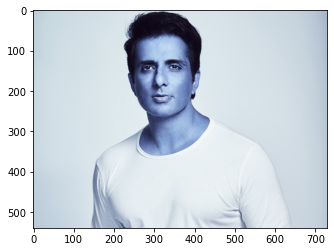

In [43]:
plt.imshow(img)

In [44]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #converts 3 dimensional image into 2 dimension (removes RGB value)
gray.shape

(540, 730)

In [45]:
gray

array([[204, 204, 204, ..., 185, 184, 184],
       [204, 203, 205, ..., 185, 184, 184],
       [204, 204, 205, ..., 186, 185, 184],
       ...,
       [203, 203, 204, ..., 203, 202, 202],
       [203, 203, 204, ..., 203, 202, 202],
       [203, 203, 203, ..., 203, 202, 202]], dtype=uint8)

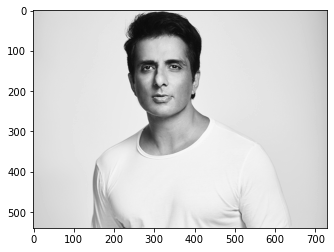

In [46]:
plt.imshow(gray, cmap='gray') #gray image

In [47]:
#This CascadeClassifier is used to detect different features in images
face_cascade= cv2.CascadeClassifier(r"C:\Users\Harshendra singh bha\Desktop\ML\Project\haar-cascade-files\haarcascade_frontalface_default.xml")
eye_cascade= cv2.CascadeClassifier(r"C:\Users\Harshendra singh bha\Desktop\ML\Project\haar-cascade-files\haarcascade_eye.xml")
face= face_cascade.detectMultiScale(gray,1.3,5)
face

array([[226,  69, 179, 179]])

In [48]:
(x,y,w,h)=face[0]


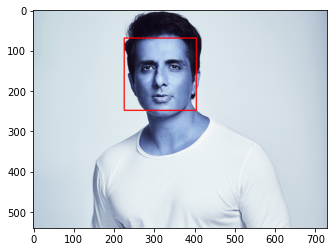

In [49]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#enclosing the face by rectangle
plt.imshow(face_img)

[https://pythonprogramming.net/haar-cascade-face-eye-detection-python-opencv-tutorial/]  documentation for enclosing face and eyes

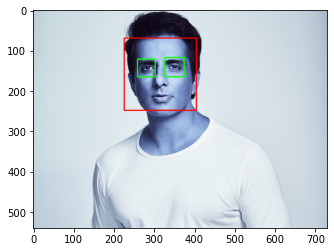

In [50]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:                                          
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)   
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()



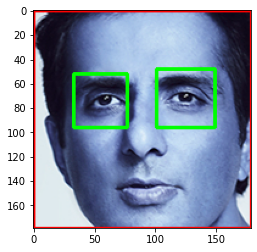

In [51]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [52]:
def get_cropped_image_if_2_eyes(image_path): #get cropped image of given image
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(gray,1.3,5)
    for(x,y,w,h) in faces:
        roi_gray= gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

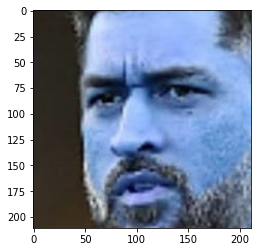

In [53]:
Cropped_image= get_cropped_image_if_2_eyes("./imgs/MS_dhoni/MS_dhoni_2.jpg")
plt.imshow(Cropped_image)

## Now going through each of the data and aims to same output as above

In [54]:
path_to_data= "./imgs/"
path_to_cropped_data= "./imgs/cropped/"

In [55]:
import os #'os' is used to perform operating system based operation
img_dirs=[]
for entry in os.scandir(path_to_data): #scanning each of sub-directories
    if entry.is_dir():
        img_dirs.append(entry.path)

In [56]:
img_dirs

['./imgs/Amitabh_bachchan',
 './imgs/MS_dhoni',
 './imgs/roman_reigns',
 './imgs/Ronaldo',
 './imgs/sonu_sood']

In [57]:
import shutil
if os.path.exists(path_to_cropped_data): #if there is any directory or sub-directory exist then it will be removed
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)    #new directory will be created

## creating cropped image(s) of each image in cropped folder

In [58]:
cropped_image_dirs = []
celebrity_file_names_dict={}


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

Amitabh_bachchan
./imgs/cropped/Amitabh_bachchan
MS_dhoni
./imgs/cropped/MS_dhoni
roman_reigns
./imgs/cropped/roman_reigns
Ronaldo
./imgs/cropped/Ronaldo
sonu_sood
./imgs/cropped/sonu_sood


In [81]:
import numpy as np
import pywt # to do wavelet transform of seeked image
import cv2
def w2d(img,mode='haar',level=1):
    imArray= img
    imArray= cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray= np.float32(imArray)
    imArray/=255;
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H*=225;
    imArray_H= np.uint8(imArray_H)
    return imArray_H

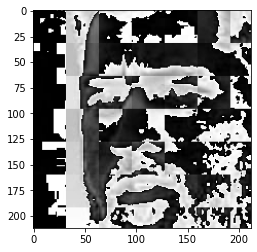

In [82]:
im_har= w2d(Cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray') #the part that is white has an important value as an input

In [83]:
class_dict=  {} #assigning dummy variables to celebreties
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]= count
    count= count+1
class_dict

{'Amitabh_bachchan': 0,
 'MS_dhoni': 1,
 'roman_reigns': 2,
 'Ronaldo': 3,
 'sonu_sood': 4}

## Now training input and outputs for ML model

In [84]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None: # I had deleted some inavalid data manually 
            continue
        scalled_raw_img = cv2.resize(img, (32, 32)) #to make all images of same scale
        img_har = w2d(img,'db1',5)#wavelet transformed image 
        scalled_img_har = cv2.resize(img_har, (32, 32))#scalled image of img_har
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) #vertically stacked inputs
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [85]:
len(X[0]) #first input image size

4096

In [86]:
X= np.array(X).reshape(len(X),4096).astype(float) #float will be more specific, it will take integer as well

In [87]:
X.shape

(120, 4096)

In [88]:
X[0]

array([164., 171., 166., ...,  56., 214., 223.])

## Using different classification techniques

In [89]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

## Splitting X & y using train_test_split method

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=0)
pipe= Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))]) 
pipe.fit(X_train, y_train)# 'pipe' will scale the data and then fit using svm model
pipe.score(X_test, y_test)

0.8

In [91]:
len(X_test)

30

In [92]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.38      1.00      0.55         3
           2       1.00      0.50      0.67         6
           3       1.00      1.00      1.00         5
           4       0.86      0.75      0.80         8

    accuracy                           0.80        30
   macro avg       0.85      0.82      0.79        30
weighted avg       0.90      0.80      0.82        30



In [93]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

## Hyperparameter tuning

In [94]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],#if you remove 'svc__' before C there is going to have error similarly in other model also
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [95]:
scores= []
best_estimators= {}
import pandas as pd
for algo, mp in model_params.items():
    pipe= make_pipeline(StandardScaler(), mp['model'])
    clf= GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo]= clf.best_estimator_
    
df= pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.777778,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.555556,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.711111,{'logisticregression__C': 1}


In [96]:
best_estimators['svm'].score(X_test, y_test)

0.8333333333333334

In [97]:
best_estimators['random_forest'].score(X_test, y_test)

0.5333333333333333

In [98]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8333333333333334

In [77]:
best_clf=best_estimators['logistic_regression']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])

In [99]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [100]:
class_dict

{'Amitabh_bachchan': 0,
 'MS_dhoni': 1,
 'roman_reigns': 2,
 'Ronaldo': 3,
 'sonu_sood': 4}

In [101]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))